In [9]:
import pandas as pd

df = pd.read_csv("creditcard.csv")

print(df.shape)
df.head()


(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
print("Missing values per column:\n", df.isnull().sum().sort_values(ascending=False))


Missing values per column:
 Time      0
V16       0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V15       0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
Class     0
dtype: int64


In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("creditcard.csv")

In [33]:
df['Amount_log'] = np.log1p(df['Amount'])          # log transform to reduce skew
df['Hour'] = (df['Time'] / 3600) % 24              # convert seconds to hour
df.drop(columns=['Time'], inplace=True)

In [37]:
X = df.drop(columns=['Class'])                     # all input features
y_true = df['Class'] 

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
iso = IsolationForest(
    n_estimators=100,
    contamination=0.0017,   # expected fraud ratio (~0.17%)
    random_state=42
)
iso.fit(X_scaled)

IsolationForest(contamination=0.0017, random_state=42)

In [43]:
y_pred = iso.predict(X_scaled)
y_pred = np.where(y_pred == 1, 0, 1)

In [45]:
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred, digits=4))


Confusion Matrix:
 [[283941    374]
 [   381    111]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9987    0.9987    0.9987    284315
           1     0.2289    0.2256    0.2272       492

    accuracy                         0.9973    284807
   macro avg     0.6138    0.6121    0.6129    284807
weighted avg     0.9973    0.9973    0.9973    284807



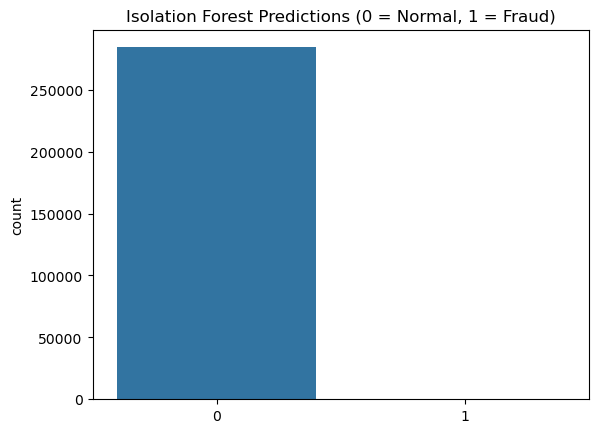

In [47]:
sns.countplot(x=y_pred)
plt.title("Isolation Forest Predictions (0 = Normal, 1 = Fraud)")
plt.show()